### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import heliopy.data.spice as spicedata
import heliopy.spice as spice
from datetime import datetime, timedelta
import astropy.units as u
from astropy.time import Time
import sunpy
import astropy
import matplotlib.dates as mdates
from sunpy.coordinates import get_body_heliographic_stonyhurst
from datetime import datetime
import os
from ai import cdas, cs
from mpl_toolkits.mplot3d import Axes3D
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fb6f6764610>

In [2]:
kernels = spicedata.get_kernel('psp')
kernels += spicedata.get_kernel('psp_pred')
spice.furnish(kernels)
psp = spice.Trajectory('SPP')

In [3]:
frame = 'HCI'
starttime =datetime(2021, 10,2)
endtime = datetime(2021,10,14)
times = []
while starttime < endtime:
    times.append(starttime)
    starttime += timedelta(days=1)
psp_time_num=mdates.date2num(times)     

spice.furnish(spicedata.get_kernel('psp_pred'))
psp.generate_positions(times,'Sun',frame)
psp.change_units(astropy.units.AU) 
[psp_r, psp_lat, psp_lon]=cs.cart2sp(psp.x,psp.y,psp.z)  

In [4]:
obstime = Time('2017-07-31T07:54:00.005')    ### planet position
planet_list = ['sun','venus','earth','mars']
planet_coord =[get_body_heliographic_stonyhurst(this_planet, time=obstime) for this_planet in planet_list]

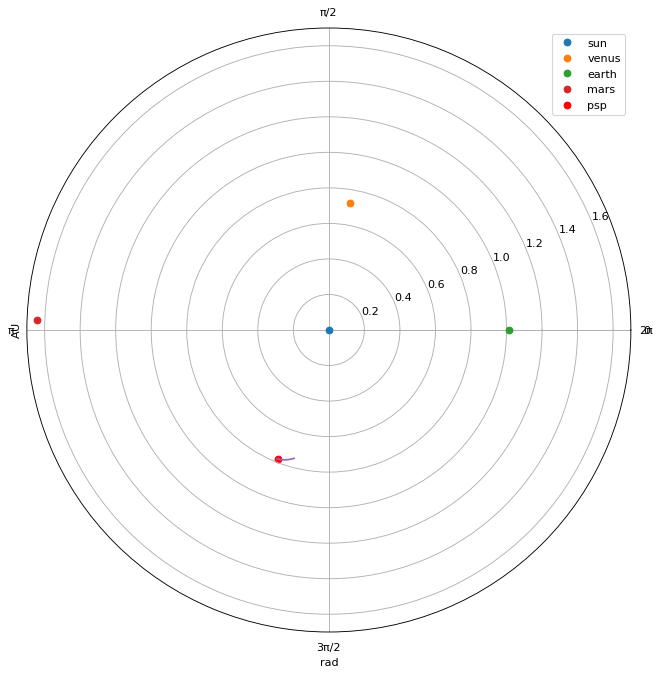

In [5]:
#%matplotlib qt
fig = plt.figure(figsize = (20,10) , dpi= 80) ### planet ploting
ax = fig.add_subplot(projection='polar')

for this_planet, this_coord in zip(planet_list, planet_coord):
    plt.plot(this_coord.lon.to('rad'), this_coord.radius, 'o', label=this_planet)
ax.plot(psp_lon,psp_r)
ax.scatter(psp_lon[1],psp_r[1],color='red',label='psp')
ax.set_ylim([0,1.7])
plt.legend()
plt.show()


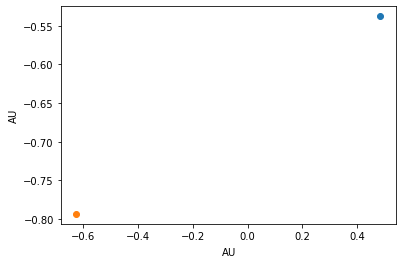

[1.13832016] AU


In [6]:
############# Earth
starttime =datetime(2017, 7, 31)
endtime = datetime(2017, 8, 1)
earth_time = []
while starttime < endtime:
    earth_time.append(starttime)
    starttime += timedelta(days=1)
earth_time_num=mdates.date2num(earth_time)     

earth=spice.Trajectory('Earth') 
earth.generate_positions(earth_time,'Sun',frame)
earth.change_units(astropy.units.AU)  
[earth_r, earth_lat, earth_lon]=cs.cart2sp(earth.x,earth.y,earth.z)


################# venus
venus_time_num=earth_time_num
venus=spice.Trajectory('Venus')  
venus.generate_positions(earth_time,'Sun',frame)  
venus.change_units(astropy.units.AU)  
[venus_r, venus_lat, venus_lon]=cs.cart2sp(venus.x,venus.y,venus.z)


############### Mars

# mars_time_num=earth_time_num
# mars=spice.Trajectory('MARS')  
# mars.generate_positions(earth_time,'Sun',frame)  
# mars.change_units(astropy.units.AU)  
# # print(earth_time)
# [mars_r, mars_lat, mars_lon]=cs.cart2sp(mars.x,mars.y,mars.z)

plt.scatter(venus.x,venus.y)
plt.scatter(earth.x,earth.y)
plt.show()

distance = np.sqrt( (earth.x-venus.x)**2 + (earth.y-venus.y)**2)
print(distance)